In [1]:
# Created 6 Sep 23 (Jupyter) with results of battery recalculation after viva
# or code to make Ch5 Table 5.7, Figs. 5.8 and 5.9.
# To do KDE plots of emissions intensity (EI) of S0-S4 to show distribution of
# datapoints in each scenario. Includes all 166 sites. AND
# Including LCA_used and LCA_generation (considering LCA based on capacity and until transport stage)
# these LCA results are columns K & 0 on 'S0_utilisation_rate' tab in excel 'Ch5 LCA Project Jua (19Jun23)_afterviva'
# which are LCA cap. initial + inv+ mounting + transport so Scenario C
# check python version for plots: 'emi_kde_S0-S4-LCA_transport'
# Some plots are saved in word: 'Chapter 5 thesis graveyard' & 'Ch5_prelresults_9Jun23', 'LCA_revisited_afterviva'
#


import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Move to path where csv is saved
path = "/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Modelling PJua analysis/Results_outputs"

cwd = os.getcwd()
cwd

os.chdir(path)
cwd  #pwd

'/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Doctos PhD/PhD milestones/Thesis writing/Chapter writing/PhD thesis VF/PhD thesis images submission/Figures source'

In [2]:
pwd

'/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Modelling PJua analysis/Results_outputs'

In [3]:
# Imports/reads csv of Emissions intensity of S0-S4 (created with another code)
emi_S0_S4 = pd.read_csv("emi_s0_s4.csv")
emi_S0_S4.describe().round(2)

,S0_EI,S1_EI,S2_EI,S3_EI,S4_EI
count,166.00,166.00,166.00,166.00,166.00
mean,487.80,377.51,306.95,259.76,243.54
std,285.80,163.96,144.89,105.51,97.54
min,130.72,194.90,165.94,133.97,132.02
25%,302.14,281.23,223.91,195.73,182.35
50%,404.83,329.72,271.62,235.90,218.03
75%,601.45,418.43,343.59,283.80,266.04
max,2195.91,1582.41,1512.61,815.83,759.69


In [4]:
# Change path to import csv with LCA results (preliminary results for now)
path2="/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/LCA/Plots LCA PJua/LCA plots after viva"
os.chdir(path2)
cwd  #pwd

'/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Doctos PhD/PhD milestones/Thesis writing/Chapter writing/PhD thesis VF/PhD thesis images submission/Figures source'

In [5]:
pwd

'/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/LCA/Plots LCA PJua/LCA plots after viva'

In [6]:
# Import results from LCA which are the copied values from tab 'S0_utilisation_rate' in
# excel 'Ch5 LCA Project Jua (19Jun23)', columns K (used) and O (generation)
LCA_data = pd.read_csv("LCA_transport_battrecalc.csv")

In [7]:
# check type of columns, LCA_used and LCA_generation must be float64
LCA_data.dtypes

Site_name          object
County             object
Institution        object
LCA_used          float64
LCA_generation    float64
dtype: object

In [8]:
LCA_data.head().round(2)

,Site_name,County,Institution,LCA_used,LCA_generation
0,AIC_Nadoto_Primary_School,Turkana,School,0.79,0.14
1,AIC_Nayanaekaton_Primary_School,Turkana,School,1.01,0.14
2,A_IC_Gangani_Primary_School,Kwale,School,0.50,0.12
3,Abagarse_Primary_School,Isiolo,School,1.05,0.13
4,Akadeli_Primary_School,Isiolo,School,0.44,0.13


In [9]:
LCA_data.describe().round(2)

,LCA_used,LCA_generation
count,166.00,166.00
mean,0.60,0.13
std,0.36,0.01
min,0.14,0.11
25%,0.37,0.12
50%,0.50,0.12
75%,0.77,0.13
max,2.90,0.14


In [10]:
# Convert LCA values from kg to grams selecting only columns with dtype "float64"
LCA_data[LCA_data.select_dtypes(include=["float64"]).columns] *= 1000
                                            # or delete = so it extracts the columns only to then concat

In [11]:
LCA_data.head().round(2)

,Site_name,County,Institution,LCA_used,LCA_generation
0,AIC_Nadoto_Primary_School,Turkana,School,786.24,141.20
1,AIC_Nayanaekaton_Primary_School,Turkana,School,1005.46,141.20
2,A_IC_Gangani_Primary_School,Kwale,School,501.69,123.60
3,Abagarse_Primary_School,Isiolo,School,1050.89,131.68
4,Akadeli_Primary_School,Isiolo,School,442.25,131.68


In [12]:
# Import library and set format for plotting
import seaborn as sns

In [13]:
# set style for formatting plots
sns.set(rc={"figure.dpi":300})
sns.set_context("notebook")  # change to paper maybe? I prefer notebook style i think...
sns.set_style("ticks") # with axis ticks, no background lines
# sns.set_style("whitegrid")

Text(0.5, 1.0, 'LCA total energy used')

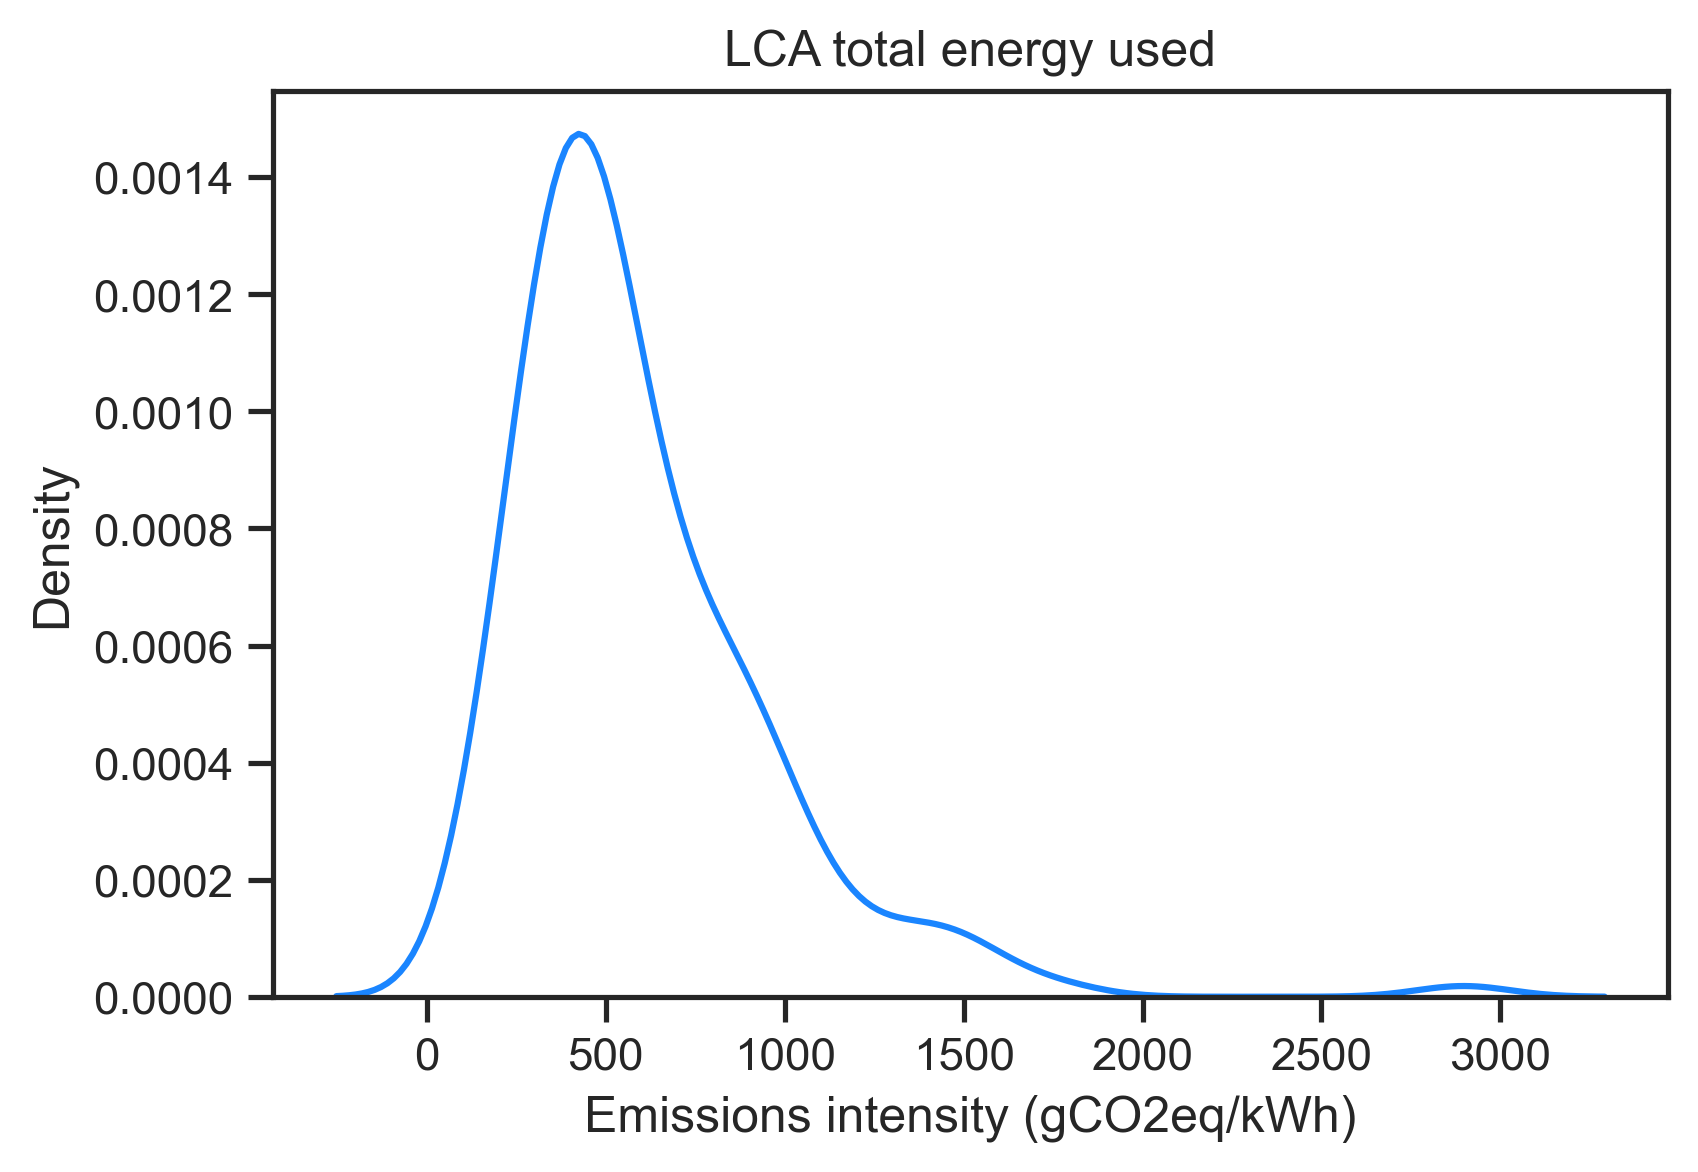

In [14]:
# Plot LCA_used
sns.kdeplot(data=LCA_data, x="LCA_used", color="#1A85FF")
plt.xlabel("Emissions intensity (gCO2eq/kWh)") # or "Emissions Intensity (gCO2eq./kWh)"
plt.title("LCA total energy used")

<AxesSubplot:xlabel='LCA_used', ylabel='Density'>

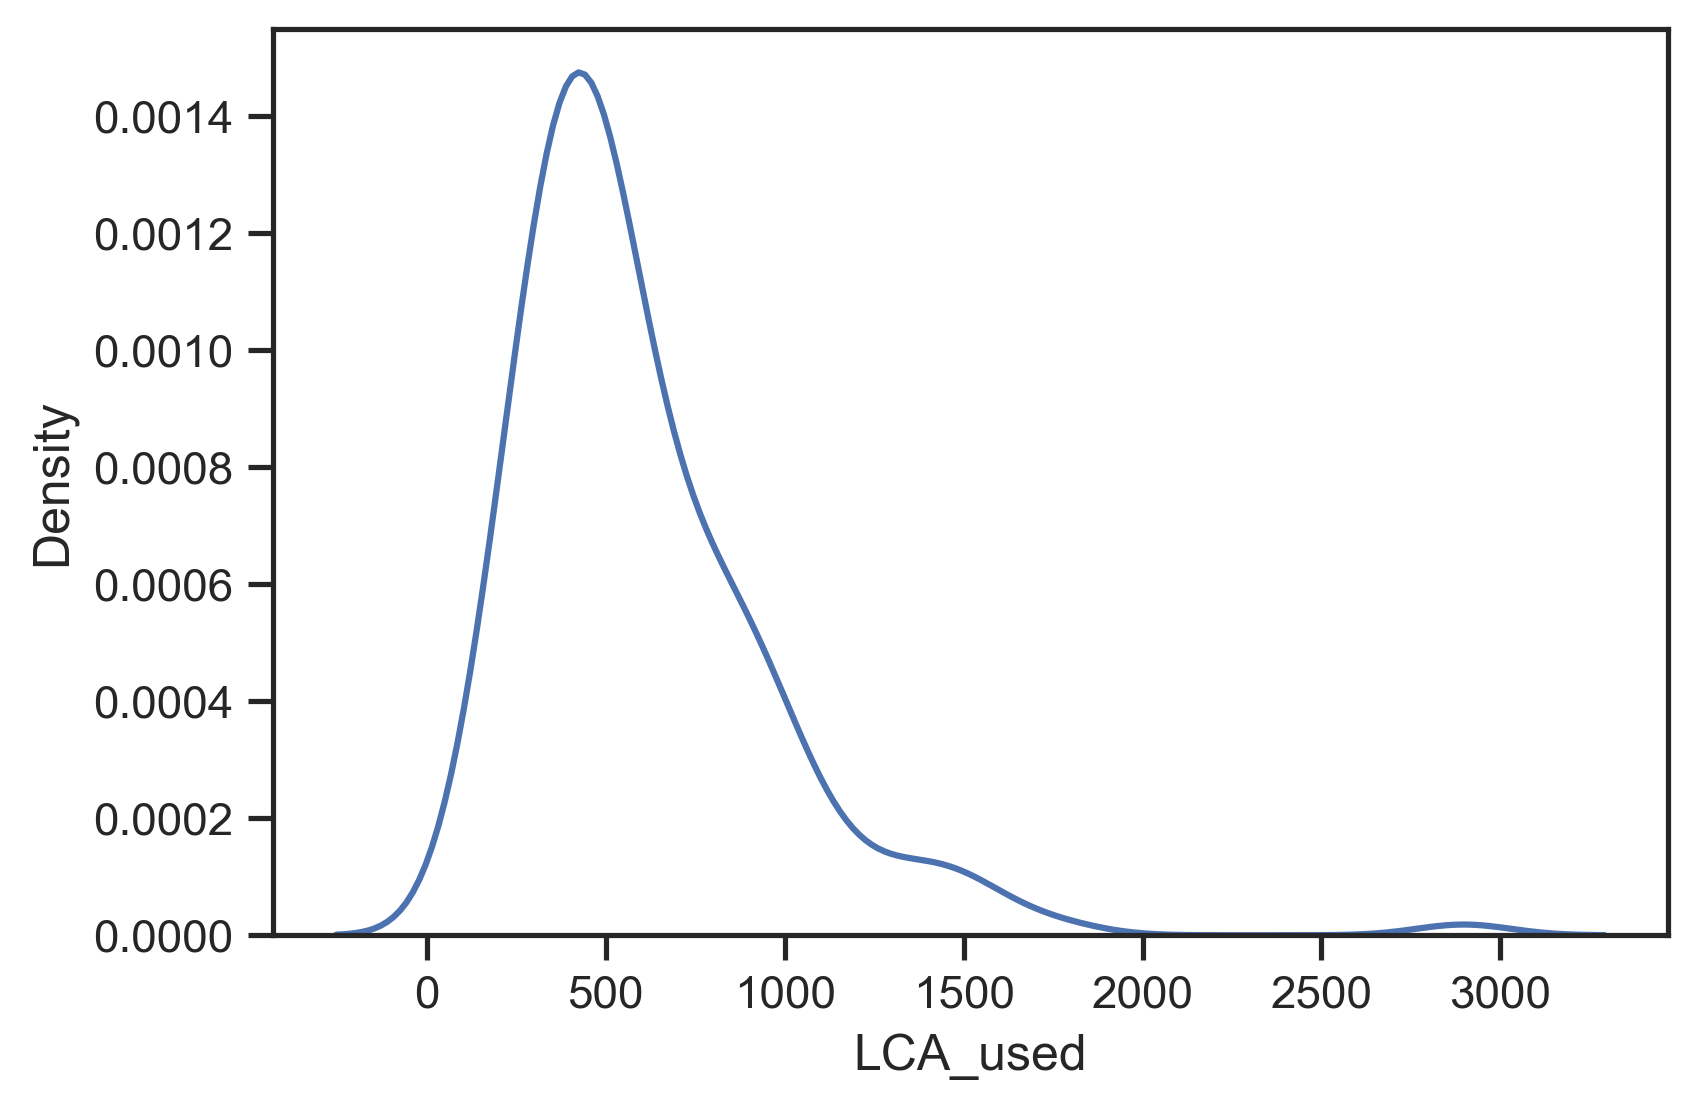

In [15]:
# Another way of doing it (plot output is the same)
sns.kdeplot(data=LCA_data.LCA_used) # fill=True

Text(0.5, 1.0, 'LCA total energy generated')

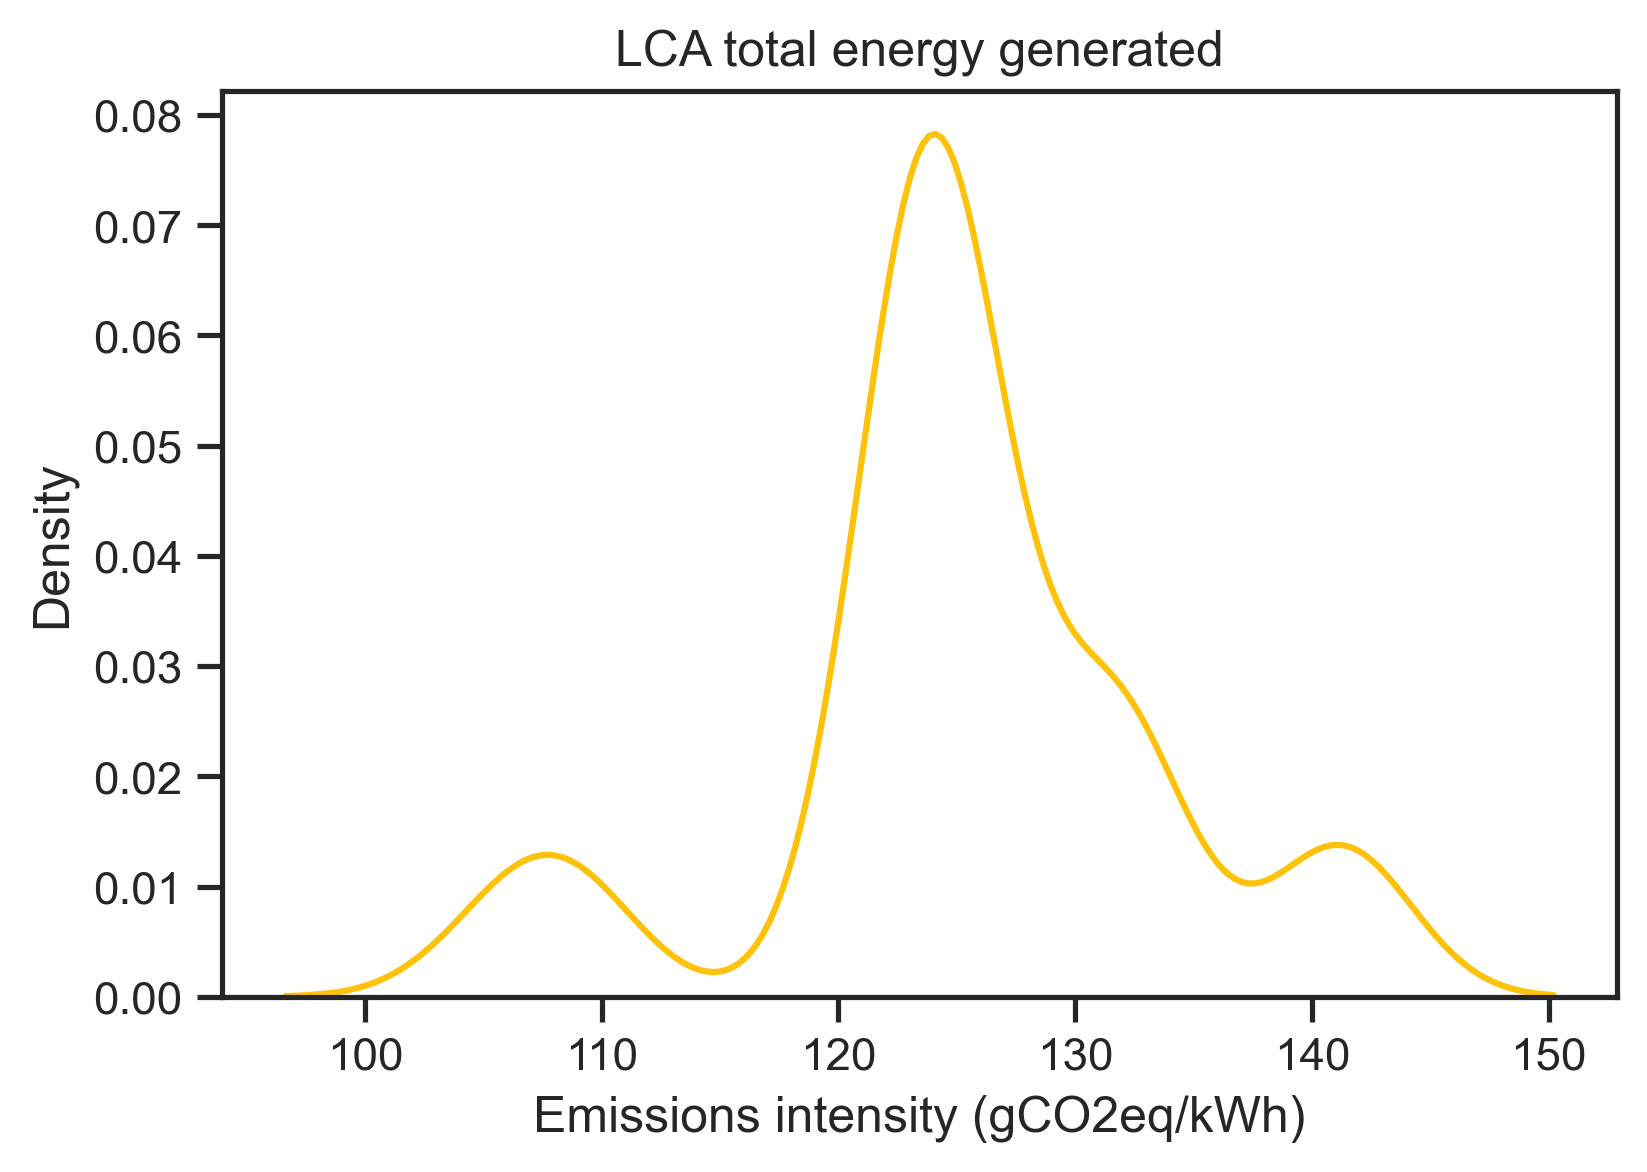

In [16]:
# Plot LCA_generated
sns.kdeplot(data=LCA_data.LCA_generation, color= "#FFC20A") # fill=True or linestyle="dashed" to plot with --
plt.xlabel("Emissions intensity (gCO2eq/kWh)") # or "Emissions Intensity (gCO2eq./kWh)"
plt.title("LCA total energy generated")

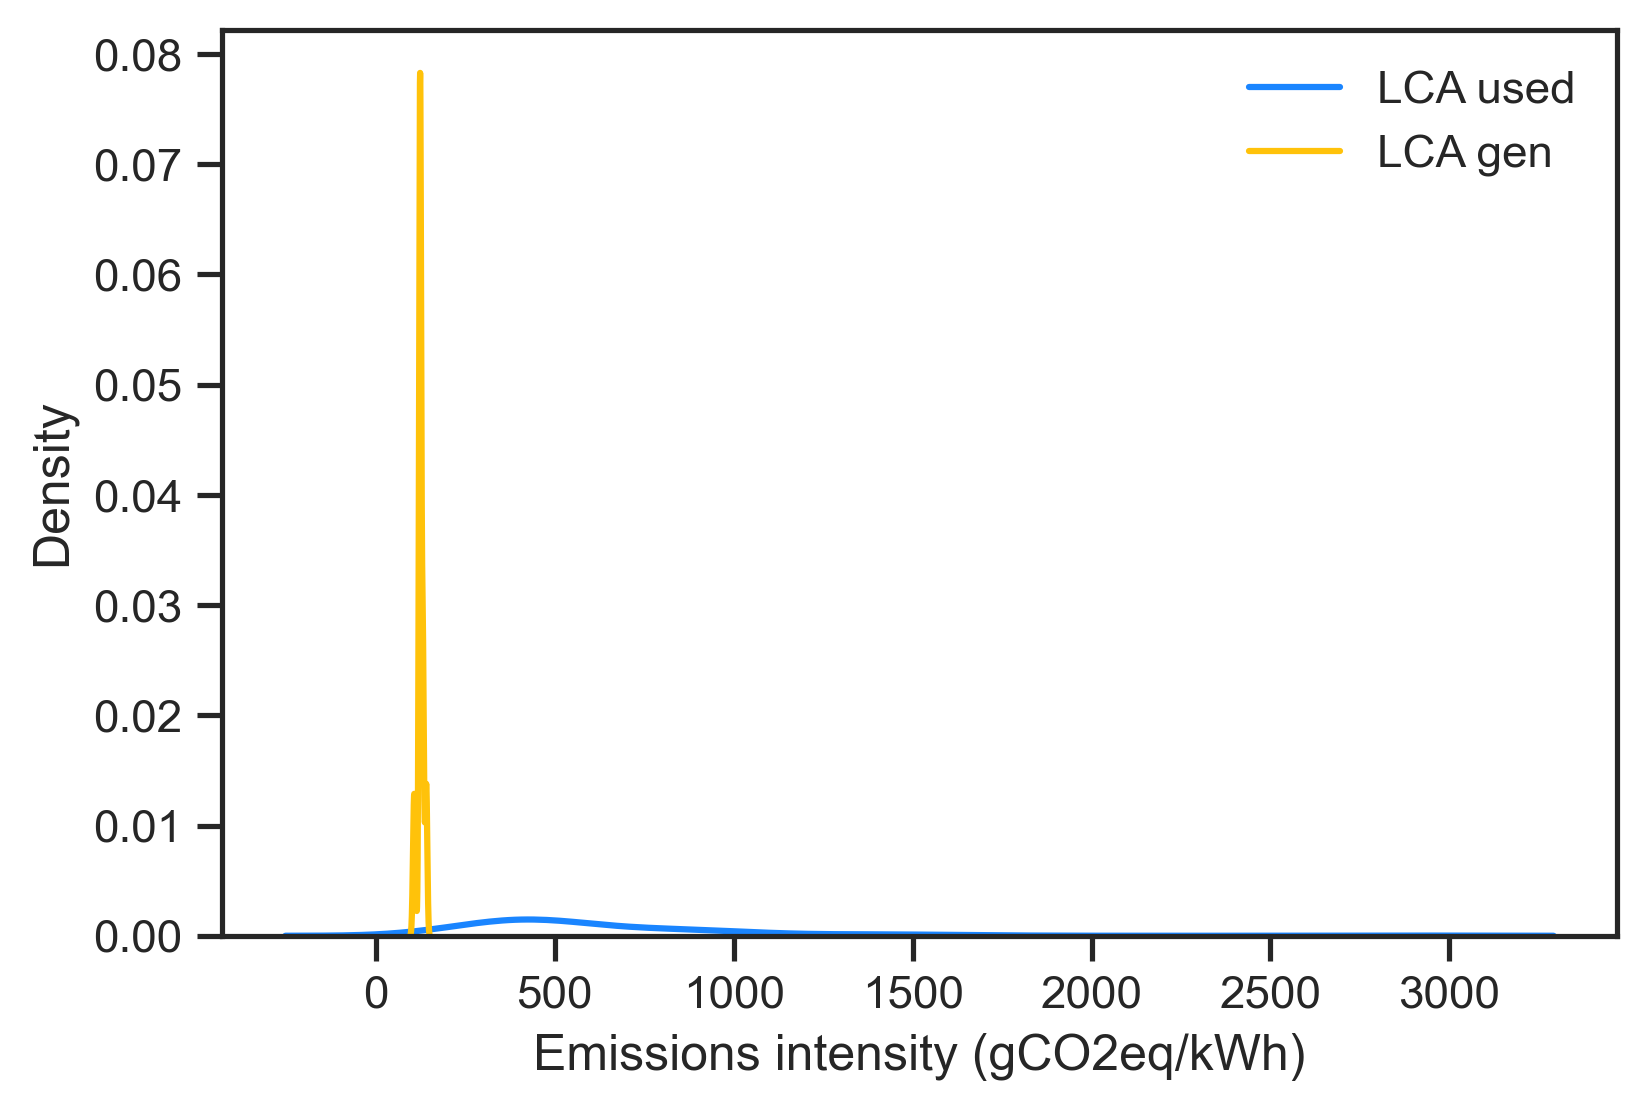

In [17]:
# Plot LCA_used and LCA_generation in same plot (looks weird)
# Final version of plot (for now)
fig,ax = plt.subplots(1,1)
sns.kdeplot(data=LCA_data.LCA_used, color="#1A85FF",label="LCA used", ax=ax) # fill=True
sns.kdeplot(data=LCA_data.LCA_generation, color="#FFC20A",label="LCA gen", ax=ax) # fill=True
plt.xlabel("Emissions intensity (gCO2eq/kWh)")
plt.legend(frameon=False)

In [18]:
# extract LCA columns to add to emi_S0_S4 df (I could just multiplied without = in *= above too,
# that returns a df with only the two numeric columns so it is a shortcut
# LCA_grams = LCA_prelres[LCA_prelres.select_dtypes(include=["float64"]).columns] * 1000
extracted_cols = LCA_data[["LCA_used", "LCA_generation"]]
# LCA_grams.equals(extracted_cols)

In [19]:
# Join df including LCA_used and LCA_generation
emi_S0_S4_LCA = emi_S0_S4.join(extracted_cols) # or LCA_grams

emi_S0_S4_LCA.columns

Index(['Site_name', 'County', 'Institution', 'S0_EI', 'S1_EI', 'S2_EI',
       'S3_EI', 'S4_EI', 'LCA_used', 'LCA_generation'],
      dtype='object')

In [20]:
emi_S0_S4_LCA.head().round(2)

,Site_name,County,Institution,S0_EI,S1_EI,S2_EI,S3_EI,S4_EI,LCA_used,LCA_generation
0,AIC_Nadoto_Primary_School,Turkana,School,565.90,600.36,488.64,387.17,302.26,786.24,141.20
1,AIC_Nayanaekaton_Primary_School,Turkana,School,723.68,391.62,362.66,249.20,249.20,1005.46,141.20
2,A_IC_Gangani_Primary_School,Kwale,School,422.40,228.79,228.79,222.38,222.38,501.69,123.60
3,Abagarse_Primary_School,Isiolo,School,796.50,304.47,273.64,273.64,273.64,1050.89,131.68
4,Akadeli_Primary_School,Isiolo,School,335.19,248.58,221.61,170.60,170.60,442.25,131.68


In [21]:
# To format plot with scenarios colors (including LCAs)
print(sns.color_palette("Set2").as_hex()) # to know colours

['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']


In [22]:
colors7 = ['#66c2a5', "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854", '#ffd92f', '#e5c494']

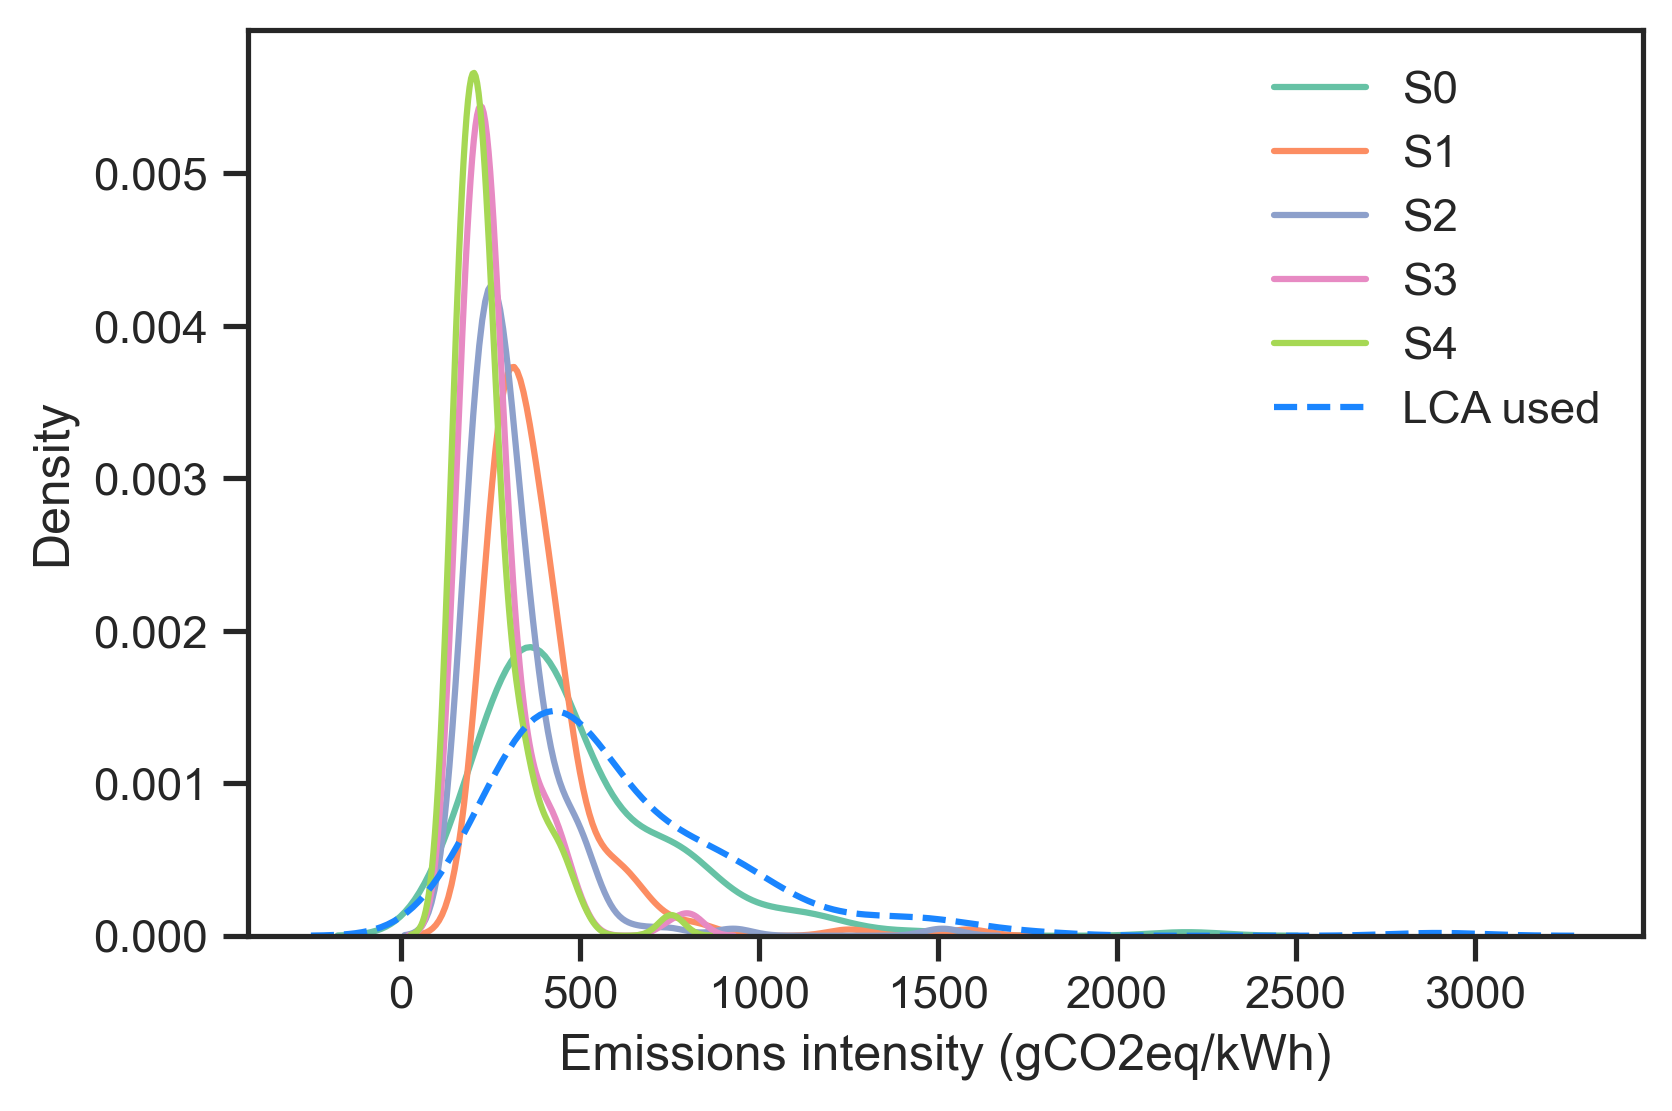

In [24]:
# Final version of plot (for now) - FIG 5.8 in Thesis submitted before viva
fig,ax = plt.subplots(1,1)
sns.kdeplot(data=emi_S0_S4_LCA.S0_EI, color=colors7[0], label="S0", ax=ax) # fill=True
sns.kdeplot(data=emi_S0_S4_LCA.S1_EI, color=colors7[1],label="S1", ax=ax) # fill=True
sns.kdeplot(data=emi_S0_S4_LCA.S2_EI, color=colors7[2],label="S2", ax=ax) # fill=True
sns.kdeplot(data=emi_S0_S4_LCA.S3_EI, color=colors7[3],label="S3", ax=ax) # fill=True
sns.kdeplot(data=emi_S0_S4_LCA.S4_EI, color=colors7[4],label="S4", ax=ax) # fill=True
sns.kdeplot(data=emi_S0_S4_LCA.LCA_used, color="#1A85FF",label="LCA used", linestyle="dashed", ax=ax) # or color=colors7[5]
plt.xlabel("Emissions intensity (gCO2eq/kWh)")
plt.legend(frameon=False)
plt.savefig("Fig_5.8_battrecal.pdf", dpi=300, bbox_inches="tight")  # change name if need to rerun
plt.show()

In [25]:
# To get PhD thesis table 5.7 values (see below) - copy these values in excel to format
emi_S0_S4_LCA.describe().round(2)

,S0_EI,S1_EI,S2_EI,S3_EI,S4_EI,LCA_used,LCA_generation
count,166.00,166.00,166.00,166.00,166.00,166.00,166.00
mean,487.80,377.51,306.95,259.76,243.54,600.37,125.42
std,285.80,163.96,144.89,105.51,97.54,364.87,8.35
min,130.72,194.90,165.94,133.97,132.02,141.48,105.65
25%,302.14,281.23,223.91,195.73,182.35,367.78,123.60
50%,404.83,329.72,271.62,235.90,218.03,504.68,124.59
75%,601.45,418.43,343.59,283.80,266.04,767.14,131.68
max,2195.91,1582.41,1512.61,815.83,759.69,2897.26,141.20


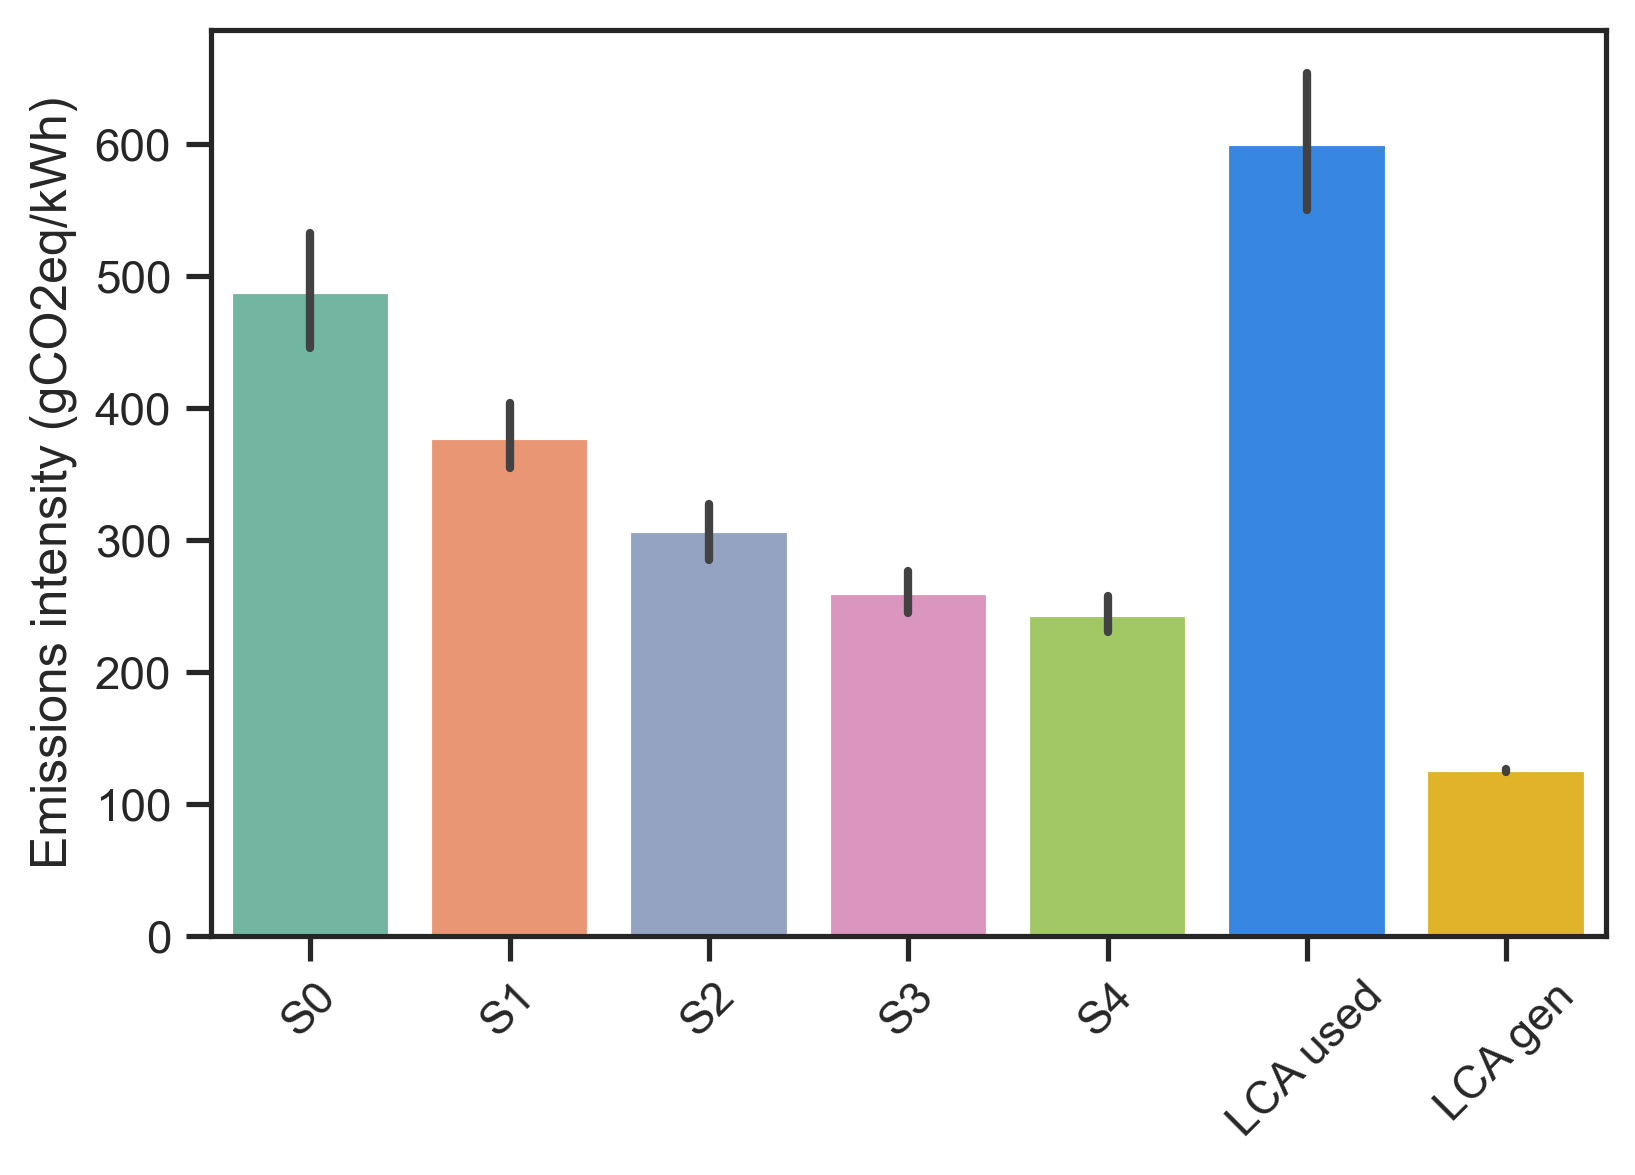

In [27]:
# Make barplot of emissions S0-S4 and LCA_used & LCA_gen
colorsbar2 = ["#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854", "#1A85FF", "#FFC20A"]
g=sns.barplot(data=emi_S0_S4_LCA, errwidth=2, palette=colorsbar2)  # errwidth=2, capsize=.3 (before palette to add caps and change width line)
g.set_xticklabels(["S0", "S1", "S2", "S3", "S4", "LCA used", "LCA gen"])
g.set(xlabel="", ylabel="Emissions intensity (gCO2eq/kWh)")
for item in g.get_xticklabels():
    item.set_rotation(45)
plt.savefig("Fig_5.9_battrecal.pdf", dpi=300, bbox_inches="tight")  # change name if need to rerun
plt.show()
# errwidth=1.5 will also work. Or leaving the default which may be to bold
# Seaborn barplot shows mean and error bars by default (no sd). I tried to change to sd but couldn't

In [ ]:
# If I rerun this code in the future, change the PDF figure name to keep previous copy (adding date maybe)
# I moved this manually to the folder "PhD thesis images submission"

# Values considered are from LCA with everything (until transport) so scenario C